In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

from lib import *

In [2]:
df = load_iedb_bcellepitopes()

In [3]:
epi = df['Epitope', 'Description']

In [4]:
k = 1
dfhuman = counter_to_df(count_kmers_proteome(human, k))
dfmouse = counter_to_df(count_kmers_proteome(mouse, k))
#epi = list(dfepitope['Description'])
dfiedb = counter_to_df(count_kmers_iterable(epi, k))

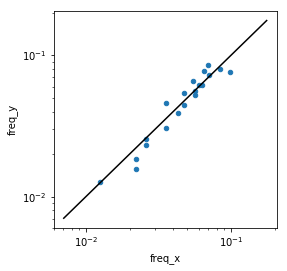

In [5]:
dfm = dfhuman.merge(dfiedb, on='seq')
fig, ax = plt.subplots(figsize=(4, 4))
x = np.logspace(np.log10(dfm['freq_x'].min())-0.25, np.log10(dfm['freq_x'].max())+0.25)
plt.plot(x, x, 'k')
dfm.plot('freq_x', 'freq_y', kind='scatter', logx=True, logy=True, ax=ax)
#ax.set_xlim(2e-7, 5e-3)
#ax.set_ylim(2e-7, 5e-3)

In [6]:
dfm['fold'] = dfm['freq_y']/dfm['freq_x']
dfm.sort_values('fold')

,seq,freq_x,freq_y,fold
19,C,0.022215,0.015653,0.704637
4,L,0.099160,0.075705,0.763464
0,M,0.021987,0.018530,0.842753
15,F,0.035858,0.030421,0.848384
16,H,0.026059,0.023231,0.891483
9,I,0.042889,0.039354,0.917578
6,Q,0.047785,0.044330,0.927691
2,R,0.056725,0.052826,0.931260
1,S,0.084211,0.079605,0.945301
17,Y,0.026148,0.025487,0.974718


In [8]:
df['Epitope', 'Parent Species'].value_counts()

Trypanosoma cruzi                                        174319
Homo sapiens                                              51913
Onchocerca volvulus                                       13071
Hepacivirus C                                              8778
Streptococcus pyogenes                                     7869
Human gammaherpesvirus 4                                   7433
Plasmodium falciparum                                      6800
Bos taurus                                                 4218
Arachis hypogaea                                           3283
Mus musculus                                               2816
Foot-and-mouth disease virus                               2613
Influenza A virus                                          2567
Mycobacterium tuberculosis                                 2414
Triticum aestivum                                          2355
Dengue virus                                               2335
Alphapapillomavirus 9                   